### Model Performance
This study explores various approaches for predicting **12-hour future wave height**, considering different input configurations and forecasting strategies.

#### Input Configurations
- **Case 1**: Past n-hour wind features
- **Case 2**: Past n-hour wave height
- **Case 3**: Past n-hour wind features + Past n-hour wave height
- **Case 4**: Past n-hour wind features + Future 12-hour wind features
- **Case 5**: Past n-hour wind features + Future 12-hour wind features + Past n-hour wave height

#### Forecasting Experiments
- **Baseline**: Use the previous hour's wave height as the prediction
- **Experiment 1**: Direct prediction of wave height over the next 12 hours
- **Experiment 2**: Rolling forecast with hourly updates across the 12-hour horizon
- **Experiment 3**: Explore different training timesteps for direct 12-hour forecasting
- **Experiment 4**: Add noise to future wind speed to simulate forecast uncertainty

#### Model Architecture Enhancement
- **Bidirectional LSTM**: Incorporates both past and future temporal dependencies to improve prediction accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

outputs = list(range(1, 13))

# Baseline
train_rmse_base = [0.384, 0.467, 0.547, 0.613, 0.675, 0.731, 0.777, 0.821, 0.858, 0.893, 0.924, 0.953]
val_rmse_base = [0.338, 0.457, 0.549, 0.637, 0.721, 0.785, 0.846, 0.898, 0.943, 0.983, 1.017, 1.053]
test_rmse_base = [0.235, 0.364, 0.464, 0.550, 0.623, 0.687, 0.745, 0.796, 0.841, 0.880, 0.914, 0.946]

# Experiment 1
train_rmse_1_1 = [0.623, 0.641, 0.664, 0.687, 0.710, 0.730, 0.749, 0.772, 0.789, 0.806, 0.823, 0.837]
val_rmse_1_1 = [0.847, 0.857, 0.879, 0.897, 0.920, 0.930, 0.942, 0.963, 0.972, 0.986, 0.998, 1.006]
test_rmse_1_1 = [0.383, 0.433, 0.490, 0.541, 0.588, 0.621, 0.654, 0.690, 0.716, 0.743, 0.767, 0.786]

train_rmse_1_2 = [0.338, 0.419, 0.488, 0.551, 0.603, 0.649, 0.687, 0.720, 0.748, 0.771, 0.791, 0.811]
val_rmse_1_2 = [0.322, 0.432, 0.523, 0.603, 0.673, 0.729, 0.776, 0.817, 0.851, 0.880, 0.904, 0.928]
test_rmse_1_2 = [0.243, 0.356, 0.441, 0.519, 0.581, 0.635, 0.681, 0.718, 0.748, 0.773, 0.794, 0.816]

train_rmse_1_3 = [0.337, 0.408, 0.473, 0.527, 0.576, 0.618, 0.655, 0.689, 0.717, 0.743, 0.764, 0.786]
val_rmse_1_3 = [0.326, 0.426, 0.516, 0.590, 0.656, 0.709, 0.755, 0.797, 0.830, 0.860, 0.884, 0.908]
test_rmse_1_3 = [0.237, 0.342, 0.425, 0.496, 0.556, 0.605, 0.650, 0.689, 0.720, 0.748, 0.770, 0.793]

train_rmse_1_4 = [0.442, 0.424, 0.413, 0.406, 0.402, 0.397, 0.399, 0.401, 0.408, 0.414, 0.426, 0.450]
val_rmse_1_4 = [0.832, 0.826, 0.832, 0.834, 0.832, 0.828, 0.821, 0.821, 0.813, 0.810, 0.798, 0.796]
test_rmse_1_4 = [0.339, 0.332, 0.336, 0.338, 0.337, 0.338, 0.325, 0.329, 0.321, 0.328, 0.326, 0.343]

train_rmse_1_5 = [0.348, 0.375, 0.408, 0.430, 0.451, 0.461, 0.472, 0.480, 0.489, 0.499, 0.506, 0.522]
val_rmse_1_5 = [0.352, 0.401, 0.461, 0.509, 0.555, 0.575, 0.600, 0.622, 0.639, 0.655, 0.668, 0.684]
test_rmse_1_5 = [0.217, 0.226, 0.246, 0.258, 0.266, 0.268, 0.268, 0.264, 0.270, 0.272, 0.276, 0.297]

# Experiment 2
train_rmse_2_1 = [0.647, 0.662, 0.690, 0.728, 0.775, 0.835, 0.857, 0.878, 0.899, 0.918, 0.938, 0.954]
val_rmse_2_1 = [0.867, 0.882, 0.904, 0.939, 0.979, 1.027, 1.044, 1.055, 1.068, 1.087, 1.099, 1.107]
test_rmse_2_1 = [0.471, 0.484, 0.509, 0.542, 0.578, 0.616, 0.652, 0.687, 0.722, 0.753, 0.782, 0.808]

train_rmse_2_2 = [0.398, 0.591, 0.769, 0.899, 0.971, 0.981, 0.963, 0.949, 0.946, 0.951, 0.957, 0.962]
val_rmse_2_2 = [0.408, 0.665, 0.884, 1.041, 1.127, 1.139, 1.128, 1.124, 1.131, 1.144, 1.156, 1.163]
test_rmse_2_2 = [0.328, 0.557, 0.751, 0.894, 0.971, 0.978, 0.954, 0.932, 0.923, 0.926, 0.932, 0.937]

train_rmse_2_3 = [0.408, 0.568, 0.675, 0.746, 0.793, 0.819, 0.842, 0.858, 0.871, 0.884, 0.898, 0.911]
val_rmse_2_3 = [0.403, 0.601, 0.731, 0.824, 0.895, 0.940, 0.982, 1.016, 1.045, 1.072, 1.091, 1.105]
test_rmse_2_3 = [0.332, 0.521, 0.625, 0.683, 0.712, 0.721, 0.737, 0.753, 0.770, 0.788, 0.805, 0.822]

train_rmse_2_4 = [0.721, 0.721, 0.723, 0.725, 0.729, 0.731, 0.734, 0.735, 0.733, 0.727, 0.716, 0.699]
val_rmse_2_4 = [0.913, 0.915, 0.917, 0.921, 0.924, 0.925, 0.925, 0.926, 0.923, 0.919, 0.913, 0.903]
test_rmse_2_4 = [0.572, 0.572, 0.572, 0.572, 0.570, 0.565, 0.557, 0.542, 0.519, 0.485, 0.436, 0.370]

train_rmse_2_5 = [0.515, 0.638, 0.683, 0.722, 0.736, 0.752, 0.778, 0.801, 0.831, 0.858, 0.858, 0.956]
val_rmse_2_5 = [0.502, 0.628, 0.656, 0.689, 0.699, 0.715, 0.747, 0.782, 0.819, 0.853, 0.871, 0.962]
test_rmse_2_5 = [0.473, 0.562, 0.560, 0.567, 0.560, 0.563, 0.586, 0.615, 0.658, 0.701, 0.716, 0.837]

# Experiment 3
train_rmse_3_1 = [0.320, 0.352, 0.375, 0.394, 0.411, 0.429, 0.441, 0.451, 0.454, 0.459, 0.472, 0.484]
val_rmse_3_1 = [0.320, 0.390, 0.441, 0.491, 0.535, 0.577, 0.611, 0.638, 0.651, 0.668, 0.691, 0.710]
test_rmse_3_1 = [0.183, 0.212, 0.228, 0.233, 0.243, 0.254, 0.263, 0.268, 0.263, 0.262, 0.261, 0.267]

train_rmse_3_2 = [0.318, 0.357, 0.382, 0.407, 0.425, 0.444, 0.455, 0.470, 0.479, 0.488, 0.497, 0.507]
val_rmse_3_2 = [0.305, 0.374, 0.428, 0.478, 0.521, 0.552, 0.585, 0.604, 0.624, 0.644, 0.659, 0.670]
test_rmse_3_2 = [0.183, 0.209, 0.225, 0.239, 0.243, 0.248, 0.260, 0.267, 0.271, 0.275, 0.272, 0.276]

train_rmse_3_3 = [0.319, 0.354, 0.392, 0.408, 0.422, 0.438, 0.455, 0.466, 0.476, 0.483, 0.490, 0.507]
val_rmse_3_3 = [0.309, 0.379, 0.435, 0.482, 0.523, 0.557, 0.578, 0.604, 0.617, 0.640, 0.656, 0.665]
test_rmse_3_3 = [0.173, 0.204, 0.222, 0.228, 0.233, 0.242, 0.246, 0.252, 0.241, 0.245, 0.243, 0.251]

train_rmse_3_4 = [0.331, 0.354, 0.381, 0.401, 0.419, 0.433, 0.447, 0.460, 0.462, 0.475, 0.482, 0.491]
val_rmse_3_4 = [0.332, 0.386, 0.442, 0.485, 0.528, 0.557, 0.583, 0.606, 0.620, 0.637, 0.653, 0.670]
test_rmse_3_4 = [0.213, 0.224, 0.245, 0.239, 0.248, 0.241, 0.239, 0.244, 0.242, 0.244, 0.247, 0.251]

train_rmse_3_5 = [0.330, 0.359, 0.384, 0.411, 0.427, 0.441, 0.451, 0.464, 0.473, 0.482, 0.488, 0.500]
val_rmse_3_5 = [0.329, 0.385, 0.433, 0.481, 0.520, 0.548, 0.579, 0.599, 0.620, 0.639, 0.656, 0.673]
test_rmse_3_5 = [0.210, 0.221, 0.227, 0.235, 0.238, 0.238, 0.242, 0.245, 0.251, 0.257, 0.252, 0.260]

train_rmse_3_6 = [0.328, 0.365, 0.392, 0.406, 0.425, 0.443, 0.453, 0.460, 0.468, 0.480, 0.488, 0.496]
val_rmse_3_6 = [0.318, 0.385, 0.432, 0.475, 0.517, 0.553, 0.580, 0.597, 0.615, 0.643, 0.659, 0.680]
test_rmse_3_6 = [0.196, 0.232, 0.241, 0.229, 0.237, 0.239, 0.243, 0.241, 0.239, 0.241, 0.250, 0.259]

train_rmse_3_7 = [0.347, 0.364, 0.391, 0.416, 0.432, 0.448, 0.457, 0.469, 0.479, 0.486, 0.487, 0.498]
val_rmse_3_7 = [0.319, 0.375, 0.426, 0.469, 0.511, 0.539, 0.567, 0.590, 0.609, 0.629, 0.647, 0.667]
test_rmse_3_7 = [0.181, 0.210, 0.225, 0.229, 0.235, 0.241, 0.245, 0.251, 0.246, 0.244, 0.247, 0.254]

# Experiment 4
test_rmse_4_1 = [0.221, 0.341, 0.454, 0.527, 0.587, 0.653, 0.722, 0.773, 0.832, 0.870, 0.899, 0.951]
test_rmse_4_2 = [0.188, 0.247, 0.326, 0.294, 0.266, 0.266, 0.336, 0.328, 0.268, 0.245, 0.264, 0.281]

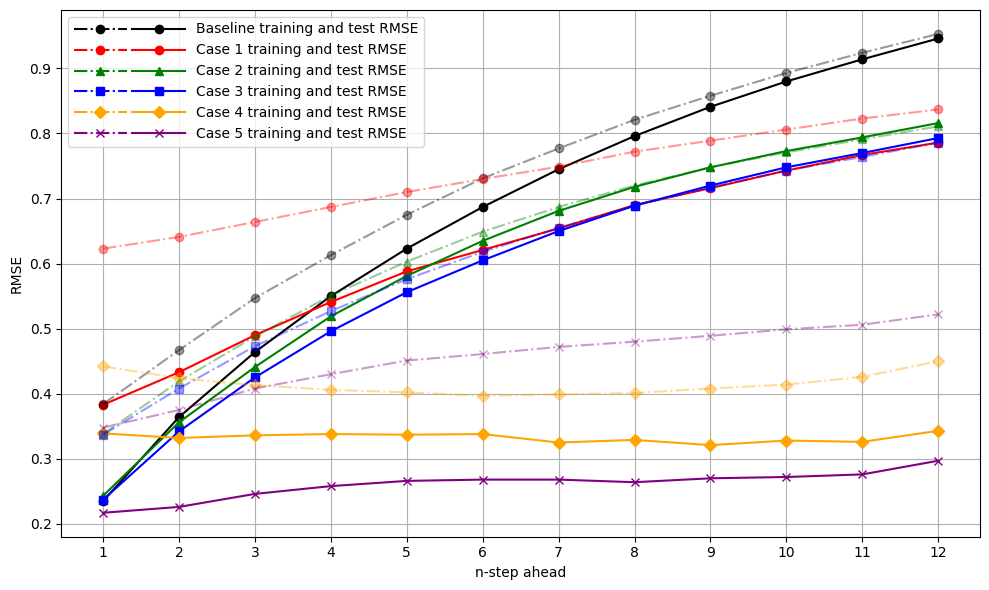

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(outputs, test_rmse_base, color='k', linestyle='-', marker='o', label='Baseline RMSE')
plt.plot(outputs, test_rmse_1_1, color='r', linestyle='-', marker='o', label='Case 1 RMSE')
plt.plot(outputs, test_rmse_1_2, color='g', linestyle='-', marker='^', label='Case 2 RMSE')
plt.plot(outputs, test_rmse_1_3, color='b', linestyle='-', marker='s', label='Case 3 RMSE')
plt.plot(outputs, test_rmse_1_4, color='orange', linestyle='-', marker='D', label='Case 4 RMSE')
plt.plot(outputs, test_rmse_1_5, color='purple', linestyle='-', marker='x', label='Case 5 RMSE')

plt.plot(outputs, train_rmse_base, color='k', linestyle='-.', marker='o', alpha=0.4)
plt.plot(outputs, train_rmse_1_1, color='r', linestyle='-.', marker='o', alpha=0.4)
plt.plot(outputs, train_rmse_1_2, color='g', linestyle='-.', marker='^', alpha=0.4)
plt.plot(outputs, train_rmse_1_3, color='b', linestyle='-.', marker='s', alpha=0.4)
plt.plot(outputs, train_rmse_1_4, color='orange', linestyle='-.', marker='D', alpha=0.4)
plt.plot(outputs, train_rmse_1_5, color='purple', linestyle='-.', marker='x', alpha=0.4)

elements = [
    ((Line2D([0], [0], color='k', linestyle='-.', marker='o'), Line2D([0], [0], color='k', linestyle='-', marker='o')), 'Baseline training and test RMSE'),
    ((Line2D([0], [0], color='r', linestyle='-.', marker='o'), Line2D([0], [0], color='r', linestyle='-', marker='o')), 'Case 1 training and test RMSE'),
    ((Line2D([0], [0], color='g', linestyle='-.', marker='^'), Line2D([0], [0], color='g', linestyle='-', marker='^')), 'Case 2 training and test RMSE'),
    ((Line2D([0], [0], color='b', linestyle='-.', marker='s'), Line2D([0], [0], color='b', linestyle='-', marker='s')), 'Case 3 training and test RMSE'),
    ((Line2D([0], [0], color='orange', linestyle='-.', marker='D'), Line2D([0], [0], color='orange', linestyle='-', marker='D')), 'Case 4 training and test RMSE'),
    ((Line2D([0], [0], color='purple', linestyle='-.', marker='x'), Line2D([0], [0], color='purple', linestyle='-', marker='x')), 'Case 5 training and test RMSE')]

handles = [pair[0] for pair in elements]
labels = [pair[1] for pair in elements]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=8, loc='best')
plt.xticks(outputs)
plt.xlabel('n-step ahead')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.savefig("exp_1.png", dpi=1200, format='png')
plt.show()

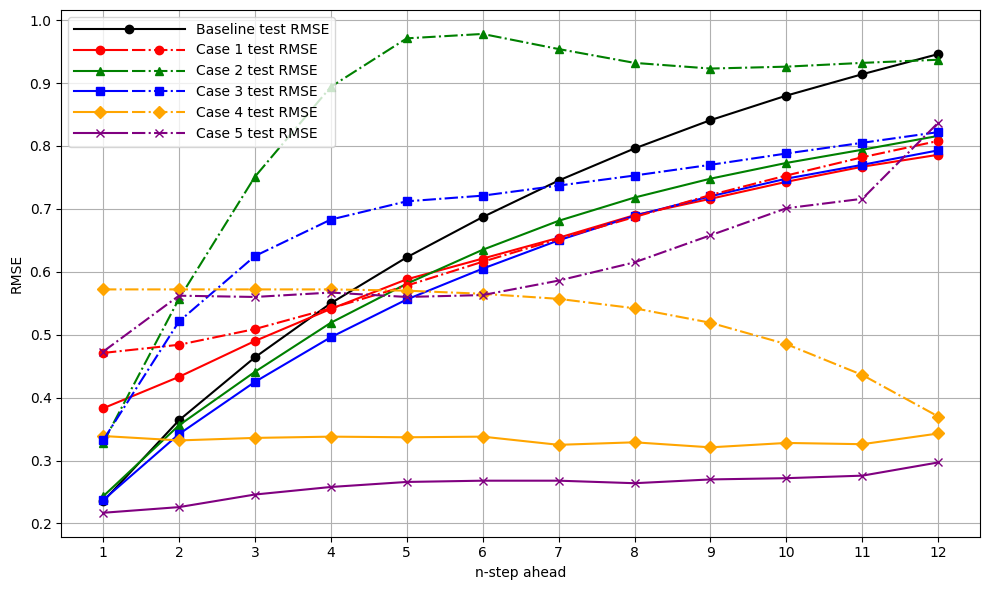

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(outputs, test_rmse_base, color='k', linestyle='-', marker='o')

plt.plot(outputs, test_rmse_1_1, color='r', linestyle='-', marker='o')
plt.plot(outputs, test_rmse_1_2, color='g', linestyle='-', marker='^')
plt.plot(outputs, test_rmse_1_3, color='b', linestyle='-', marker='s')
plt.plot(outputs, test_rmse_1_4, color='orange', linestyle='-', marker='D')
plt.plot(outputs, test_rmse_1_5, color='purple', linestyle='-', marker='x')

plt.plot(outputs, test_rmse_2_1, color='r', linestyle='-.', marker='o')
plt.plot(outputs, test_rmse_2_2, color='g', linestyle='-.', marker='^')
plt.plot(outputs, test_rmse_2_3, color='b', linestyle='-.', marker='s')
plt.plot(outputs, test_rmse_2_4, color='orange', linestyle='-.', marker='D')
plt.plot(outputs, test_rmse_2_5, color='purple', linestyle='-.', marker='x')

elements = [
    (Line2D([0], [0], color='k', linestyle='-', marker='o'), 'Baseline test RMSE'),
    ((Line2D([0], [0], color='r', linestyle='-', marker='o'), Line2D([0], [0], color='r', linestyle='-.', marker='o')), 'Case 1 test RMSE'),
    ((Line2D([0], [0], color='g', linestyle='-', marker='^'), Line2D([0], [0], color='g', linestyle='-.', marker='^')), 'Case 2 test RMSE'),
    ((Line2D([0], [0], color='b', linestyle='-', marker='s'), Line2D([0], [0], color='b', linestyle='-.', marker='s')), 'Case 3 test RMSE'),
    ((Line2D([0], [0], color='orange', linestyle='-', marker='D'), Line2D([0], [0], color='orange', linestyle='-.', marker='D')), 'Case 4 test RMSE'),
    ((Line2D([0], [0], color='purple', linestyle='-', marker='x'), Line2D([0], [0], color='purple', linestyle='-.', marker='x')), 'Case 5 test RMSE')]

handles = [pair[0] for pair in elements]
labels = [pair[1] for pair in elements]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=8, loc='best')
plt.xticks(outputs)
plt.xlabel('n-step ahead')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.savefig("exp_2.png", dpi=1200, format='png')
plt.show()

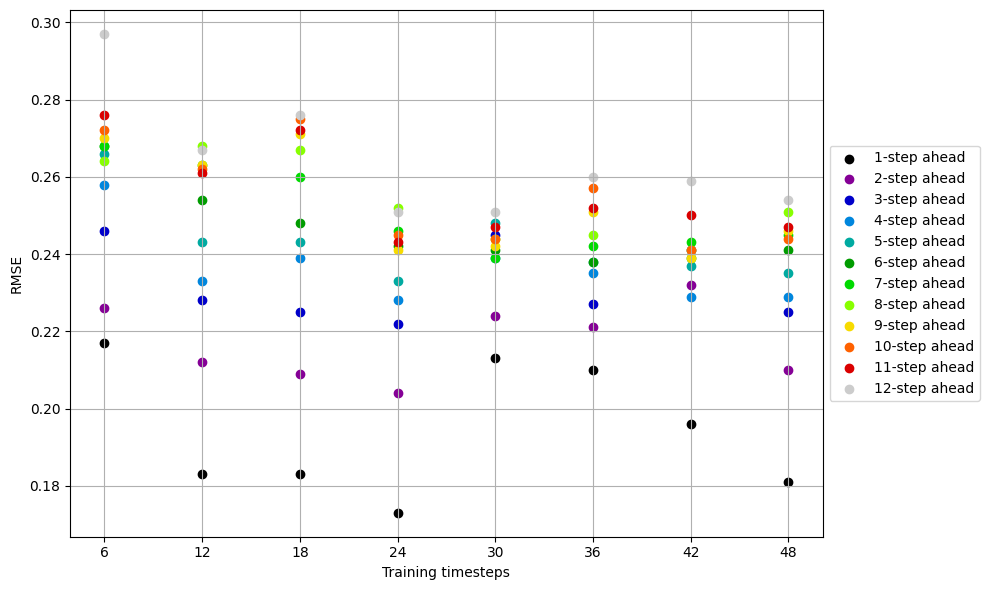

In [4]:
rmse_arr = np.array([test_rmse_1_5, test_rmse_3_1, test_rmse_3_2, test_rmse_3_3,
                     test_rmse_3_4, test_rmse_3_5, test_rmse_3_6, test_rmse_3_7])

plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('nipy_spectral', 12)
colors = [cmap(i) for i in range(12)]
for i in range(12):
    plt.scatter(np.arange(6, 50, 6), rmse_arr[:, i], color=colors[i], marker='o', label=f'{i+1}-step ahead')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(6, 50, 6))
plt.xlabel('Training timesteps')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.savefig("exp_3.png", dpi=1200, format='png')
plt.show()

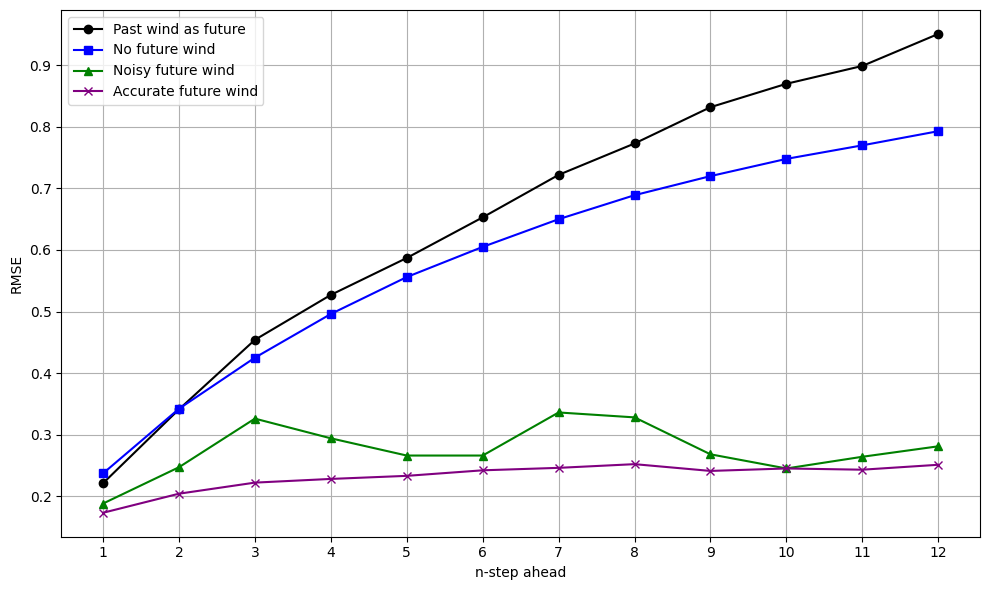

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(outputs, test_rmse_4_1, color='k', linestyle='-', marker='o', label='Past wind as future')
plt.plot(outputs, test_rmse_1_3, color='b', linestyle='-', marker='s', label='No future wind')
plt.plot(outputs, test_rmse_4_2, color='g', linestyle='-', marker='^', label='Noisy future wind')
plt.plot(outputs, test_rmse_3_3, color='purple', linestyle='-', marker='x', label='Accurate future wind')

plt.legend()
plt.xticks(outputs)
plt.xlabel('n-step ahead')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.savefig("exp_4.png", dpi=1200, format='png')
plt.show()